In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import json
import collections
%matplotlib inline

In [2]:
# Read in recipe information
# Downloaded from https://www.kaggle.com/shuyangli94/food-com-recipes-and-user-interactions?select=RAW_recipes.csv
filename = '~/Downloads/raw_recipes.csv'
rec = pd.read_csv(filename)

In [3]:
# Look at basic recipe information
print(rec.dtypes)
rec.head()

name              object
id                 int64
minutes            int64
contributor_id     int64
submitted         object
tags              object
nutrition         object
n_steps            int64
steps             object
description       object
ingredients       object
n_ingredients      int64
dtype: object


,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [4]:
# Obtain all recipes for **BROWNIES**
desserts = rec[rec.tags.str.contains('brownie').astype('bool')]
print(desserts.dtypes)
print(desserts.shape)
desserts.head()

name              object
id                 int64
minutes            int64
contributor_id     int64
submitted         object
tags              object
nutrition         object
n_steps            int64
steps             object
description       object
ingredients       object
n_ingredients      int64
dtype: object
(12440, 12)


,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
30,get the sensation brownies,27087,70,37305,2002-05-03,"['weeknight', 'time-to-make', 'course', 'main-...","[174.4, 13.0, 67.0, 5.0, 4.0, 26.0, 7.0]",11,"['preheat oven to 350 degrees', 'grease 13 x 9...",a yummy thick chocolate mint brownie from york...,"['butter', 'sugar', 'vanilla', 'eggs', 'all-pu...",9
72,one pot brownies,32271,40,41809,2002-06-25,"['60-minutes-or-less', 'time-to-make', 'course...","[1389.5, 129.0, 410.0, 26.0, 42.0, 211.0, 51.0]",8,"['melt chocolate and butter in heavy pot', 'le...",this recipe was submitted by mrs. stuart padno...,"['unsweetened chocolate squares', 'butter', 's...",7
94,symphony brownies,44895,45,51224,2002-10-29,"['60-minutes-or-less', 'time-to-make', 'course...","[5728.3, 470.0, 1941.0, 87.0, 140.0, 443.0, 22...",10,"['preheat oven to 350 degrees , or 325 degrees...",a,"['betty crocker fudge brownie mix', 'eggs', 'w...",5
103,turtle squares,58651,30,35635,2003-04-07,"['30-minutes-or-less', 'time-to-make', 'course...","[172.4, 16.0, 51.0, 1.0, 2.0, 26.0, 6.0]",15,"['preheat oven to 350 degrees f', 'spray a 13 ...",for lovers of pecans and chocolate...,"['flour', 'brown sugar', 'butter', 'pecans', '...",5
111,1 brownies in the world best ever,333281,40,985201,2008-10-27,"['60-minutes-or-less', 'time-to-make', 'course...","[138.4, 10.0, 50.0, 3.0, 3.0, 19.0, 6.0]",10,['heat the oven to 350f and arrange the rack i...,"these are the most; chocolatey, moist, rich, d...","['bittersweet chocolate', 'unsalted butter', '...",9


Text(0,0.5,'# of steps in recipe')

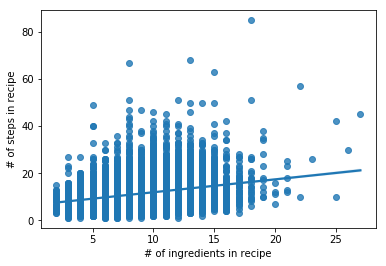

In [5]:
# Sanity check - are number of ingredients correlated with the # of steps in each recipe?
sns.regplot(x='n_ingredients', y='n_steps', data=desserts)
plt.xlabel('# of ingredients in recipe')
plt.ylabel('# of steps in recipe')

In [6]:
# Get a master list of all ingredients - and clean up data in the process
# Many ingredient descriptions can be combined into the same label (described slightly differently across recipes)!

master_list = []

# loop over recipes
for idx in desserts.index:

    # list of ingredients for each recipe
    curr_ingred = eval(desserts.loc[idx, 'ingredients']) 
    
    curr_ingred = ['eggs' if i in ['egg', 'extra large eggs', 'extra large egg'] else i for i in curr_ingred]
    curr_ingred = ['all-purpose-flour' if i in ['flour', 'all-purpose flour', 'plain flour', \
                    'unsifted flour', 'white flour']  else i for i in curr_ingred]
    curr_ingred = ['unsalted-butter' if i in ['butter', 'unsalted butter', 'real butter', 'sweet butter'] \
                   else i for i in curr_ingred]
    curr_ingred = ['granulated-sugar' if i in ['granulated sugar', 'sugar', 'white sugar'] \
                   else i for i in curr_ingred]
    curr_ingred = ['chocolate-chips' if 'chocolate chips' in i else i for i in curr_ingred]
    curr_ingred = ['cocoa-powder' if 'cocoa' in i else i for i in curr_ingred]
    curr_ingred = ['oil' if i in ['vegetable oil','canola oil'] else i for i in curr_ingred]
    curr_ingred = ['unsweetened-chocolate' if ('unsweetened' in i and 'chocolate' in i) else i for i in curr_ingred]
    curr_ingred = ['unsweetened-chocolate' if ('baking' in i and 'chocolate' in i) else i for i in curr_ingred]
    curr_ingred = ['powdered-sugar' if i in ['icing sugar', 'powdered sugar'] else i for i in curr_ingred]
    curr_ingred = ['powdered-sugar' if 'confectioner' in i else i for i in curr_ingred]
    curr_ingred = ['vanilla-extract' if i in ['vanilla extract','pure vanilla extract', 'vanilla'] \
                   else i for i in curr_ingred]
    curr_ingred = ['cinnamon' if 'cinnamon' in i else i for i in curr_ingred]
    curr_ingred = ['applesauce' if 'applesauce' in i else i for i in curr_ingred]
    curr_ingred = ['peanut-butter' if 'peanut butter' in i else i for i in curr_ingred]
    curr_ingred = ['hot-water' if i in ['hot water', 'boiling water', 'warm water'] else i for i in curr_ingred]
    curr_ingred = ['cool-water' if i in ['water', 'cold water'] else i for i in curr_ingred]
    curr_ingred = ['egg-white' if 'egg white' in i else i for i in curr_ingred]
    curr_ingred = ['egg-yolk' if 'egg yolk' in i else i for i in curr_ingred]
    curr_ingred = ['instant-coffee' if 'instant coffee' in i else i for i in curr_ingred]
    curr_ingred = ['instant-coffee' if 'espresso' in i else i for i in curr_ingred]
    curr_ingred = ['semisweet-chocolate' if ('semisweet' in i and 'chocolate' in i) else i for i in curr_ingred]
    curr_ingred = ['semisweet-chocolate' if ('semi-sweet' in i and 'chocolate' in i) else i for i in curr_ingred]
    curr_ingred = ['coconut' if 'coconut' in i else i for i in curr_ingred]
    curr_ingred = ['mini-marshmallow' if ('mini' in i and 'marshmallow' in i) else i for i in curr_ingred]
    curr_ingred = ['heavy-cream' if ('heavy' in i and 'cream' in i) else i for i in curr_ingred]
    curr_ingred = ['splenda' if 'splenda' in i else i for i in curr_ingred]
    curr_ingred = ['chocolate-syrup' if ('chocolate' in i and 'syrup' in i) else i for i in curr_ingred]
    curr_ingred = ['self-raising-flour-' if ('self' in i and 'flour' in i) \
                   else i for i in curr_ingred]
    curr_ingred = ['agave' if 'agave' in i else i for i in curr_ingred]
    curr_ingred = ['banana' if 'banana' in i else i for i in curr_ingred]
    curr_ingred = ['nutmeg' if 'nutmeg' in i else i for i in curr_ingred]
    curr_ingred = ['walnut' if 'walnut' in i else i for i in curr_ingred]
    curr_ingred = ['pecan' if 'pecan' in i else i for i in curr_ingred]
    curr_ingred = ['cooking-spray' if 'cooking spray' in i else i for i in curr_ingred]
    curr_ingred = ['graham-cracker' if 'graham cracker' in i else i for i in curr_ingred]
    curr_ingred = ['cream-cheese' if 'cream cheese' in i else i for i in curr_ingred]
    curr_ingred = ['allspice' if 'allspice' in i else i for i in curr_ingred]
    curr_ingred = ['olive-oil' if 'olive oil' in i else i for i in curr_ingred]
    curr_ingred = ['unbleached-all-purpose-flour' if i in ['unbleached all-purpose flour', \
                   'unbleached flour', 'unbleached white flour'] else i for i in curr_ingred]
    curr_ingred = ['skim-milk' if i in ['nonfat milk', 'skim milk'] \
                   else i for i in curr_ingred]
    curr_ingred = ['oats' if 'oats' in i else i for i in curr_ingred]
    curr_ingred = ['oats' if 'oatmeal' in i else i for i in curr_ingred]
    curr_ingred = ['clove' if 'clove' in i else i for i in curr_ingred]
    curr_ingred = ['pumpkin' if 'pumpkin' in i else i for i in curr_ingred]
    curr_ingred = ['shortening' if 'shortening' in i else i for i in curr_ingred]
    curr_ingred = ['shortening' if 'crisco' in i else i for i in curr_ingred]
    curr_ingred = ['lemon-juice' if 'lemon juice' in i else i for i in curr_ingred]
    curr_ingred = ['cardamom' if 'cardamom' in i else i for i in curr_ingred]
    curr_ingred = ['apple' if 'apple' in i else i for i in curr_ingred]
    curr_ingred = ['ginger' if 'ginger' in i else i for i in curr_ingred]
    curr_ingred = ['coffee' if i in ['coffee', 'brewed coffee', 'strong coffee'] else i for i in curr_ingred]
    curr_ingred = ['marshmallow-creme' if 'marshmallow' in i and (('creme' in i) or ('cream' in i)) \
                   else i for i in curr_ingred]
    curr_ingred = ['orange-zest' if 'orange' in i and (('zest' in i) or ('rind' in i)) else i for i in curr_ingred]
    curr_ingred = ['lemon-zest' if 'lemon' in i and (('zest' in i) or ('rind' in i)) else i for i in curr_ingred]
    curr_ingred = ['raspberry' if i in ['raspberry', 'raspberries', 'fresh raspberries', 'fresh raspberry'] \
                   else i for i in curr_ingred]
    curr_ingred = ['cool-whip' if i in ['cool whip', 'whipped topping'] \
                   else i for i in curr_ingred]

    # add to column in data frame
    desserts.loc[idx, 'ingredients-clean'] = str(curr_ingred)

    for each in curr_ingred:
        master_list.append(each)
        
# Obtain a unique list ingredients w/ # of occurances --> which ones are most common?
master_dict = collections.Counter(master_list)

/Applications/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Applications/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [7]:
# Sort unique ingredient list to see which ingredients are most common
nums = np.array(list(master_dict.values()))
labels = np.array(list(master_dict.keys()))

sort_idx = np.argsort(-nums)
nums_sort = nums[sort_idx]
labels_sort = labels[sort_idx]

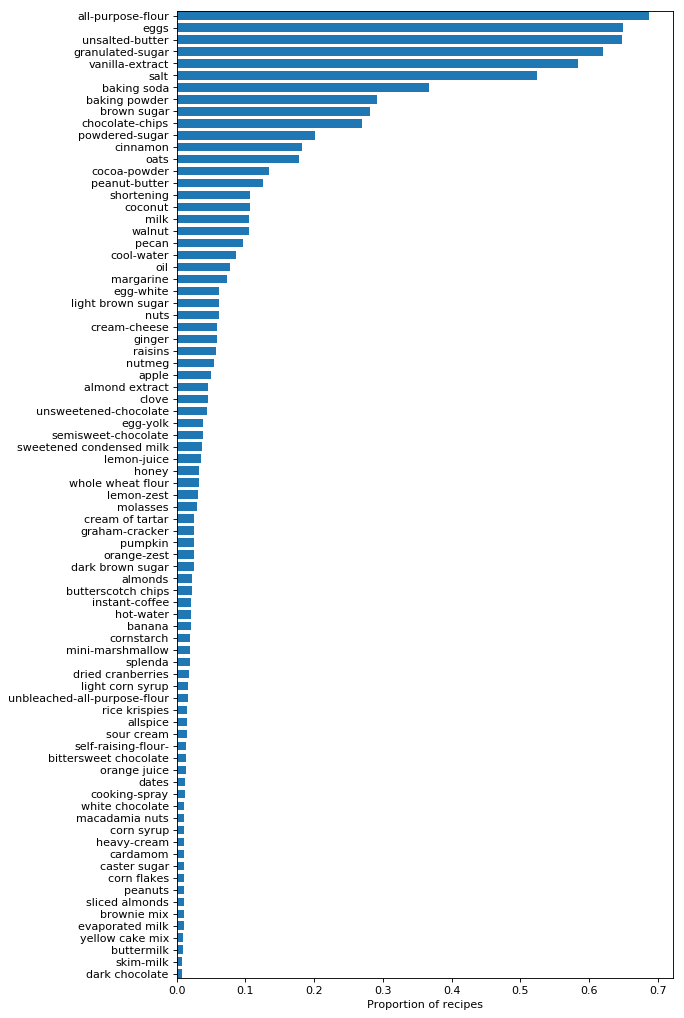

In [8]:
# Show the top ingredients - those appearing in at least 100 recipes
n = np.where(nums_sort >= 100)[0].max()
x = np.arange(0,n)
plt.figure(figsize=(8, 16), dpi=80)
plt.barh(y=x, width=np.flipud(nums_sort[:n]) / desserts.shape[0], height=.7)
plt.yticks(x, np.flipud(labels_sort[:n]))
plt.xlabel('Proportion of recipes')
plt.margins(y=0)

In [9]:
# save cleaned brownie recipe data output
desserts.to_hdf('/Users/arielle/Downloads/recipe_desserts', key='desserts')

/Applications/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2530: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block1_values] [items->['name', 'submitted', 'tags', 'nutrition', 'steps', 'description', 'ingredients', 'ingredients-clean']]

  pytables.to_hdf(path_or_buf, key, self, **kwargs)
